# Cho dữ liệu bbc (giải nén file bbc-fulltext). Đọc tất cả dữ liệu vào dataframe news theo định dạng.
Yêu cầu : Chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc phân cụm dữ liệu dựa trên cột content của dataframe news trên.
1. Áp dụng thuật toán thích hợp. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?
2. Tìm kết quả => có bao nhiêu cụm => mẫu (tin tức) nào thuộc cụm nào?
3. Nhận xét trên từng cụm: mỗi cụm có những keywords nào ? Vẽ WordClouds cho từng cụm.
4. Kiểm chứng lại với class đã có

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
data = pd.DataFrame(columns=['Id','Content','Class'])

In [4]:
#path = './du lieu cung cap/bbc/'
path = './drive/MyDrive/LDS6_S7N_NguyenDinhVuong/LDS6.NguyenDinhVuong_CuoiKy/du lieu cung cap/bbc'

In [5]:
list_folder = []
for i in os.listdir(path):
    if os.path.isdir(path + '/'+ i):
        list_folder.append(i)
print(list_folder)

['business', 'entertainment', 'tech', 'sport', 'politics']


In [6]:
content = []
a = 0
for i in list_folder:
    for file in os.listdir(path+'/'+i):
      content.append([a,open(path + '/'+ i + '/' + file,'r',encoding='unicode_escape').read().replace('\n',''),i])
      a += 1

In [7]:
data = pd.DataFrame(content,columns=['Id','Content','Class'])
data.head()

,Id,Content,Class
0,0,Ask Jeeves tips online ad revivalAsk Jeeves ha...,business
1,1,US interest rate rise expectedUS interest rate...,business
2,2,UK economy facing 'major risks'The UK manufact...,business
3,3,India's Reliance family feud heats upThe ongoi...,business
4,4,VW considers opening Indian plantVolkswagen is...,business


In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["Mr", "want", "many", "use", "used", "first", "one", "new", "two", "including", "time","will", "said", "say", "made", "added", "now", "year", "UK", "US", "make", "people"])

In [9]:
text_data = np.array(data.Content)
text_data

array(["Ask Jeeves tips online ad revivalAsk Jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes.The firm's revenue nearly tripled in the fourth quarter of 2004, exceeding $86m (Â£46m). Ask Jeeves, once among the best-known names on the web, is now a relatively modest player. Its $17m profit for the quarter was dwarfed by the $204m announced by rival Google earlier in the week. During the same quarter, Yahoo earned $187m, again tipping a resurgence in online advertising.The trend has taken hold relatively quickly. Late last year, marketing company Doubleclick, one of the leading providers of online advertising, warned that some or all of its business would have to be put up for sale. But on Thursday, it announced that a sharp turnaround had brought about an unexpected increase in profits. Neither Ask Jeeves nor Doubleclick thrilled investors with their profit news, however. In both cases, their shares fell b

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords)
bag_of_words = vectorizer.fit_transform(text_data)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mr', 'mustn', 're', 'shan', 'shouldn', 'uk', 'us', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
#count = CountVectorizer(stop_words= stopwords)
#count.fit(text_data)
#bag_of_words = count.transform(text_data)
#bag_of_words

In [15]:
X = bag_of_words.toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02290602, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02223653, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
X.shape

(2225, 31200)

### Áp dụng thuật toán thích hợp. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?

Vì bài toán thuộc về Text Cluster sẽ phù hợp hơn khi sử dụng Kmeans vì thuật toán đơn giản, không tốn nhiều khối lượng chạy thuật toán, phù hợp cho sử dụng với ma trận rời rạc.

###Kmeans

In [17]:
distortions = []
K = range(2,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])

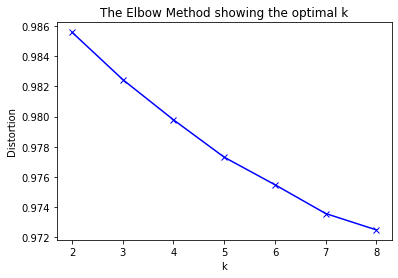

In [18]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Nhận xét:** 
Ta nhận thấy k=5 là điểm elbow, distortion bắt đầu giảm mịn.

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels_kmean = kmeans.labels_
print(centroids)
print(labels_kmean)

[[ 1.78786561e-05  1.23912802e-02  8.63230154e-05 ... -1.28749008e-19
  -5.69206141e-19 -1.21972744e-18]
 [ 5.96311195e-19  5.25808111e-03 -7.45388994e-20 ... -8.13151629e-20
  -4.06575815e-19  1.19506586e-03]
 [ 2.18081840e-04  1.21807121e-02 -1.25360876e-19 ... -1.96511644e-19
  -4.60785923e-19  4.20128342e-19]
 [ 2.64055644e-04  1.13349192e-02  1.82959117e-19 ...  2.39419310e-04
  -5.42101086e-19 -6.50521303e-19]
 [ 1.85027819e-04  2.32278867e-03  2.06676039e-19 ...  3.52365706e-19
   5.59304337e-04 -7.72494048e-19]]
[0 0 0 ... 2 2 2]


In [20]:
data['Cluster'] = labels_kmean
data.head()

,Id,Content,Class,Cluster
0,0,Ask Jeeves tips online ad revivalAsk Jeeves ha...,business,0
1,1,US interest rate rise expectedUS interest rate...,business,0
2,2,UK economy facing 'major risks'The UK manufact...,business,0
3,3,India's Reliance family feud heats upThe ongoi...,business,0
4,4,VW considers opening Indian plantVolkswagen is...,business,0


In [21]:
data.Class.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Class, dtype: int64

In [22]:
data.Cluster.value_counts()

0    749
4    524
3    488
2    261
1    203
Name: Cluster, dtype: int64

In [40]:
pd.DataFrame(data.groupby('Class').Cluster.value_counts())

Cluster
Class         Cluster         
business      0            497
              3             10
              2              2
              4              1
entertainment 1            198
              3            126
              0             60
              4              2
politics      2            259
              0            152
              3              4
              4              2
sport         4            509
              0              2
tech          3            348
              0             38
              4             10
              1              5

**Nhận xét:** 
- Kết quả chia làm 5 cụm theo các keywords có sự chênh lệch so với các cụm thật đặc biệt ở nhóm tech và enterainment. 
- Các nhóm - cụm cho thấy nhóm sport được phân bố khá chính xác với đa số vào nhóm 4, nhóm business cũng được phân với đa số vào nhóm 0, tech được phân vào nhóm 3, trong khi nhóm entertainment, politics phân rã khá nhiều. => điều này cho thấy các bài viết của politics thường liên quan nhiều đến economics, entertainment liên quan nhiều đến tech.

###Nhận xét trên từng cụm: mỗi cụm có những keywords nào ? Vẽ WordClouds cho từng cụm.

In [46]:
keywords_index = kmeans.cluster_centers_.argsort()[:, ::-1]
keywords = vectorizer.get_feature_names()
kw_list = []
for i in range(0,5):
    words = []
    for ind in order_centroids[i, :1000]:
        words.append(terms[ind])
    kw_list.append([i,words])
cv_df =  pd.DataFrame(kw_list, columns=['Cluster', 'content'])
cv_df

,Cluster,content
0,0,"[us, mr, government, growth, economy, bank, co..."
1,1,"[film, best, awards, award, films, festival, a..."
2,2,"[mr, labour, election, blair, party, brown, go..."
3,3,"[music, mobile, digital, users, technology, ga..."
4,4,"[game, england, win, cup, team, match, players..."


In [58]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(background_color='black',
                max_words=1000,
                stopwords=STOPWORDS)
stop_list = ['us','mr','us\'','mr\'','us \'','mr \'']
for word in stop_list:
    stopwords.add(word)

In [59]:
cv_df['content']=cv_df['content'].apply(str)

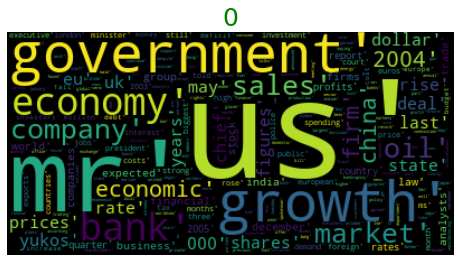

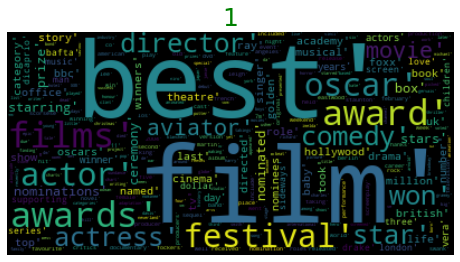

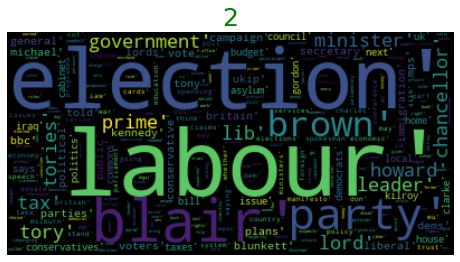

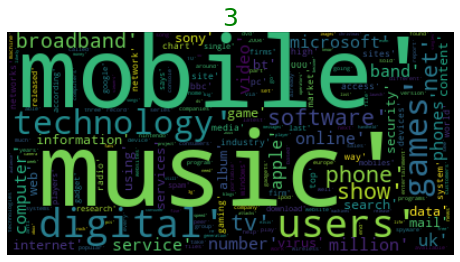

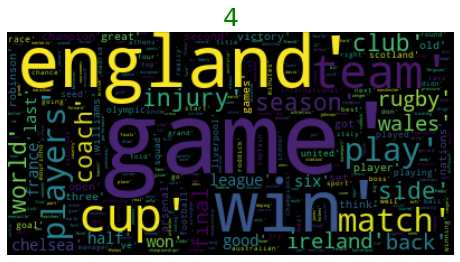

In [60]:

for text,clus in zip(cv_df['content'],cv_df['Cluster']):
    plt.figure(figsize=(8,6))
    wc.generate(text)
    plt.imshow(wc,interpolation='bilinear')
    from PIL import Image
    wc = WordCloud(background_color='black',
                    max_words=1000,
                    stopwords=stopwords,
                    contour_width=2,
                    contour_color='green')
    plt.axis('off')
    plt.title(clus,fontsize=25,color='g')
    plt.show()

###Kiểm chứng lại với class đã có

In [77]:
check_data = data.groupby('Class').Content.apply(np.array)

In [80]:
check_data

Class
business         [Ask Jeeves tips online ad revivalAsk Jeeves h...
entertainment    [Day-Lewis set for Berlin honourActor Daniel D...
politics         [MP attacked by muggers in KenyaAn MP has had ...
sport            [Beckham relief as Real go throughDavid Beckha...
tech             [IBM puts cash behind Linux pushIBM is spendin...
Name: Content, dtype: object

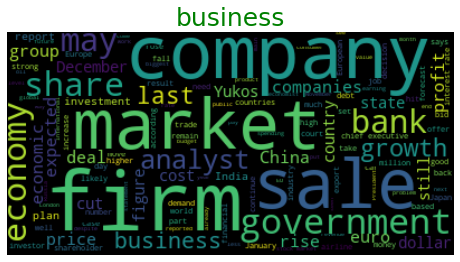

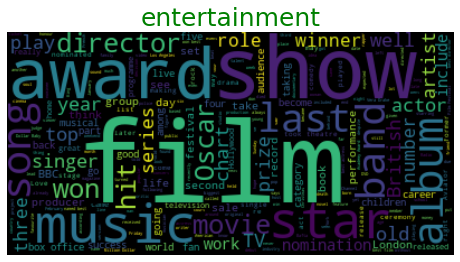

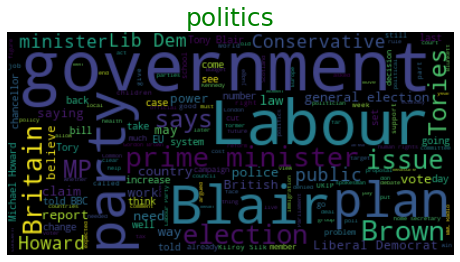

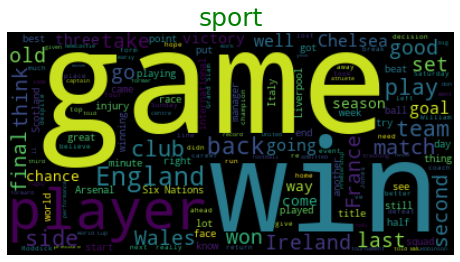

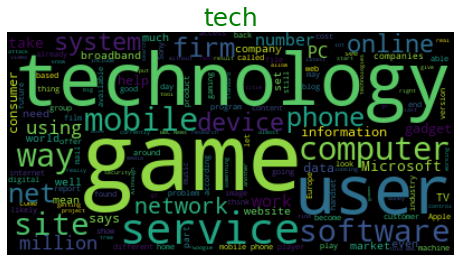

In [82]:
for text,clus in zip(check_data,check_data.index):
    plt.figure(figsize=(8,6))
    wc.generate(str(text))
    plt.imshow(wc,interpolation='bilinear')
    from PIL import Image
    wc = WordCloud(background_color='black',
                    max_words=1000,
                    stopwords=stopwords,
                    contour_width=2,
                    contour_color='green')
    plt.axis('off')
    plt.title(clus,fontsize=25,color='g')
    plt.show()